# Calculating Alpha

We have completed the regression procedure which has shown us which ESG factors are most important in affecting the yearly average of Closing Prices in the US stock market as well as the yearly averages in log returns.

Now, we can use the data we have downloaded in order to see how ESG factors affect Alpha. For this we need to find the yearly average of log returns for some broad market index.

In [7]:
import quandl
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import requests
import json
import datetime
import random

quandl.ApiConfig.api_key = "n2tNssPxEFC9-Ad79fo-" # keep this private

In [8]:
start = '2010-10-15'
end = '2018-10-15'
quandl_data = quandl.get('EOD/PRF', start_date=start, end_date=end)

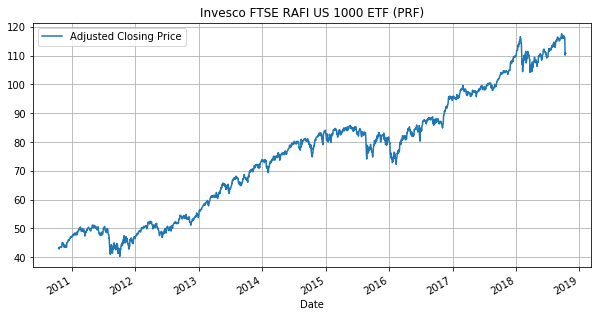

In [13]:
quandl_data.Adj_Close.plot(label = 'Adjusted Closing Price',figsize = (10,5))
plt.title('Invesco FTSE RAFI US 1000 ETF (PRF)')
plt.grid()
plt.legend()

Calculate the log return

In [15]:
quandl_data['log_ret'] = np.log(quandl_data.Adj_Close) - np.log(quandl_data.Adj_Close.shift(1))

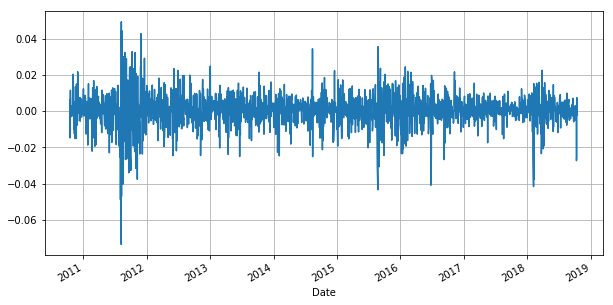

In [18]:
quandl_data.log_ret.plot(label = 'Adjusted Closing Price',figsize = (10,5))
plt.grid()

## Estimate Alpha

I am not quuite sure what the formal formula is for calculating alpha but in https://www.investopedia.com/terms/a/alpha.asp it is defined as the 'percentage measuring how the portfolio or fund performed compared to the referenced benchmark index (i.e., 3% better or 5% worse)'

Given this, if we denote the yearly average of log returns of a product $P$ and year $i$ as $P_i$ and the yearly average of log returns of the index representing the market as $M_i$ then the alpha of this product can be apprximated by:


### $a_P^i = \frac{P_i - M_i}{M_i}$

To this end we need to grouby the above table by year to get $M_i$


In [19]:
quandl_data['Date'] = pd.to_datetime(quandl_data.index, format='%Y-%m-%d')
quandl_data['Year'] = quandl_data['Date'].dt.year
quandl_yearly = quandl_data.groupby(['Year']).mean()

In [29]:
market_log_ret = quandl_yearly['log_ret']

Now, we need to take our largest dataset (aggr_data_scores_500) and create an alpha column where we will compute the above formula. The challenge is that we have to do this separately for each year.

In [26]:
#we can try to use boolean masks

#get the data
aggregate_data = pd.read_csv('data/aggr_data_scores_500.csv')
#aggregate_data.groubby(quandl_yearly['log_ret'])
aggregate_data.head()

,Year,Adj_Close,Adj_High,Adj_Low,Adj_Open,Adj_Volume,CSR Strategy Score,Close,Community Score,Date,...,Open,Period End Date,Product Responsibility Score,Resource Use Score,Shareholders Score,Social Pillar Score,Split,Volume,Workforce Score,log_ret
0,2010,30.845093,31.163094,30.525322,30.852593,60912.962963,NaN,30.845093,NaN,NaN,...,30.852593,NaN,NaN,NaN,NaN,NaN,1.0,60912.962963,NaN,-0.000089
1,2011,26.433474,26.809469,26.070326,26.476508,80155.952381,NaN,26.433474,NaN,NaN,...,26.476508,NaN,NaN,NaN,NaN,NaN,1.0,80155.952381,NaN,-0.001727
2,2012,22.110380,22.338273,21.871388,22.111560,77121.600000,NaN,22.110380,NaN,NaN,...,22.111560,NaN,NaN,NaN,NaN,NaN,1.0,77121.600000,NaN,-0.000061
3,2013,22.151925,22.406437,21.881344,22.152278,95556.349206,NaN,22.151925,NaN,NaN,...,22.152278,NaN,NaN,NaN,NaN,NaN,1.0,95556.349206,NaN,0.000520
4,2014,22.355020,22.627792,22.105017,22.374267,78081.964286,NaN,22.355020,NaN,NaN,...,22.374267,NaN,NaN,NaN,NaN,NaN,1.0,78081.964286,NaN,-0.000809


In [42]:
group = aggregate_data["Year"]
# group by that period
agg = aggregate_data.groupby([group])

temp_list = []

for year, group in agg:
    group['Alpha'] = (group['log_ret'] - market_log_ret[year])/market_log_ret[year]
    temp_list.append(group)
    
final = pd.concat(temp_list)

C:\Users\George\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
final.head()
final.shape
final.columns

Index(['Year', 'Adj_Close', 'Adj_High', 'Adj_Low', 'Adj_Open', 'Adj_Volume',
       'CSR Strategy Score', 'Close', 'Community Score', 'Date', 'Dividend',
       'ESG Combined Score', 'ESG Controversies Score',
       'ESG Period Last Update Date', 'ESG Score', 'Emissions Score',
       'Environment Pillar Score', 'Governance Pillar Score', 'High',
       'Human Rights Score', 'Innovation Score', 'Instrument', 'Low',
       'Management Score', 'Open', 'Period End Date',
       'Product Responsibility Score', 'Resource Use Score',
       'Shareholders Score', 'Social Pillar Score', 'Split', 'Volume',
       'Workforce Score', 'log_ret', 'Alpha'],
      dtype='object')

In [48]:
final.head()

,Year,Adj_Close,Adj_High,Adj_Low,Adj_Open,Adj_Volume,CSR Strategy Score,Close,Community Score,Date,...,Period End Date,Product Responsibility Score,Resource Use Score,Shareholders Score,Social Pillar Score,Split,Volume,Workforce Score,log_ret,Alpha
0,2010,30.845093,31.163094,30.525322,30.852593,60912.962963,NaN,30.845093,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,60912.962963,NaN,-0.000089,-1.055688
9,2010,38.814604,39.057985,38.256056,38.665767,5574.074074,NaN,40.578704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,5574.074074,NaN,0.000628,-0.605885
18,2010,4.269206,4.313814,4.220202,4.265311,409411.094444,NaN,12.583148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,160553.370370,NaN,0.001218,-0.236265
37,2010,4.935766,5.030044,4.830713,4.927749,396727.777778,NaN,6.612037,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,396727.777778,NaN,0.003435,1.154216
46,2010,11.315000,11.478054,11.107165,11.292222,94481.481481,NaN,11.315000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,94481.481481,NaN,0.003414,1.141391


In [50]:
final.to_csv('data/aggr_data_scores_500_alpha.csv')